#LOGISTIC REGRESSION MODEL
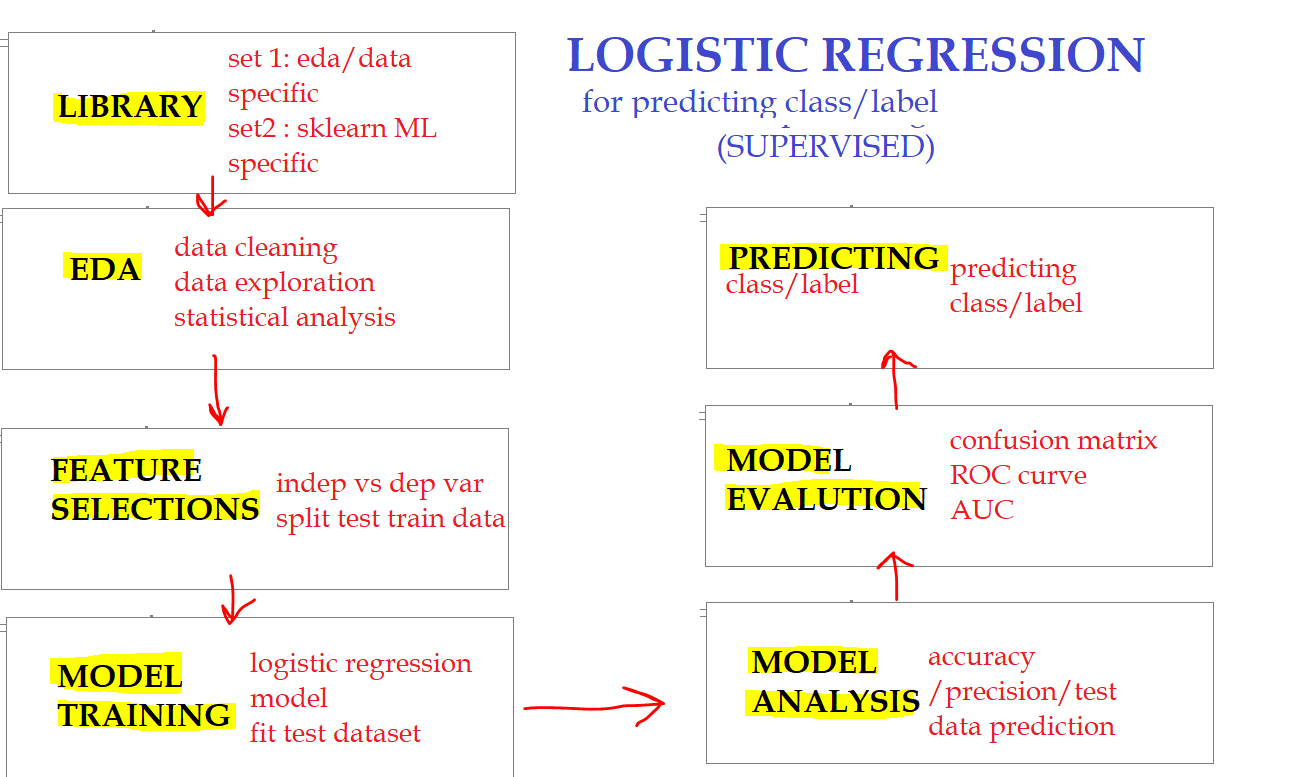

#CASE STUDY : Predict whether the client has subscribed a term deposit

In [1]:
#IMPORTING LIBRARIES SET 1 -- EDA/STATISTICAL ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING LIBRARIES SET 2 -- DATA PRE-PROCESSING
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import KFold , GridSearchCV




In [3]:
#IMPORTING LIBRARIES SET 3 -- LOGISTIC MODEL / MODEL EVALUATION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.metrics import roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [4]:
# google colab specific library
from google.colab import files
file=files.upload()




Saving bank-full.csv to bank-full.csv


In [5]:
# Importing Dataset
data = pd.read_csv('bank-full.csv')
data.head(2)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."


In [6]:
# using delimiter ;
data = pd.read_csv('bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


EDA
---
- data dictionary
- data cleaning
- variable analysis
- univariate analysis
- multivariate analysis
- correlation analysis
- statistical analysis
- required tranformations



In [7]:
#data analysis
print('no of observations = ',data.shape[0])
print('no of features = ',data.shape[1])


no of observations =  45211
no of features =  17


   DATA DICTIONARY
   -----

   Input variables:
   -  bank client data:
          1 - age (numeric)
          2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
          3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
          4 - education (categorical: "unknown","secondary","primary","tertiary")
          5 - default: has credit in default? (binary: "yes","no")
          6 - balance: average yearly balance, in euros (numeric)
          7 - housing: has housing loan? (binary: "yes","no")
          8 - loan: has personal loan? (binary: "yes","no")
          -  related with the last contact of the current campaign:
          9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
          10 - day: last contact day of the month (numeric)
          11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
          12 - duration: last contact duration, in seconds (numeric)
  - other attributes:

                13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
                14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
                15 - previous: number of contacts performed before this campaign and for this client
                16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
                                    

 -  Output variable (desired target):

                17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [88]:
#data type analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data Cleaning
----
- duplicates
- null observation


In [9]:
#NULL observation counts
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Dupliactes
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


no duplicates
no null observations

Feature analysis
---
- univariate
- multivariate

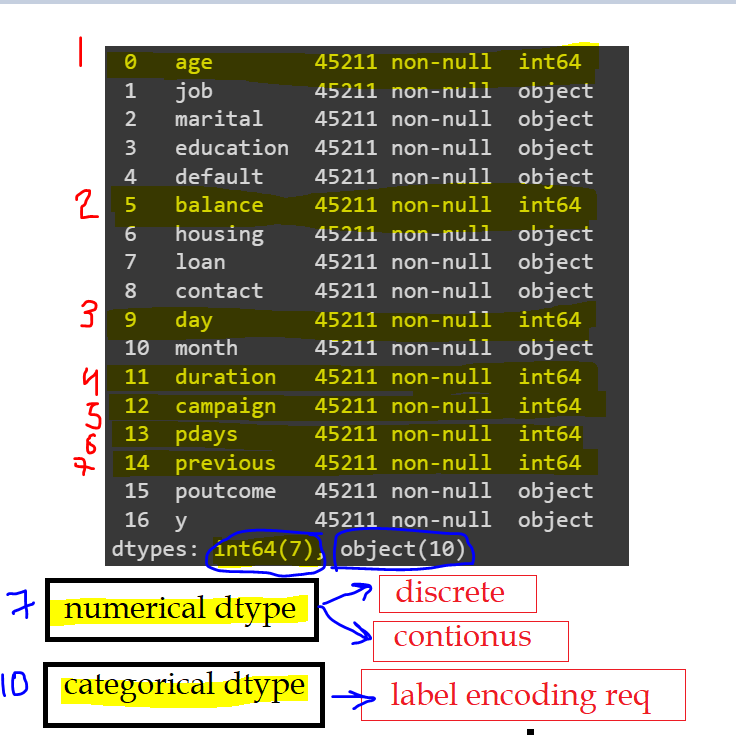


In [11]:
#New data frame of Numerical Dtype

num_vars=[i for i in data.columns if data[i].dtypes != 'O']
num_features=data[num_vars]
data[num_vars].head(3)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0


In [12]:
#Count of unique values to evaluate contionous/discrete

from numpy.lib.function_base import append
list=[]
for i in num_features.columns:
  total=sum(num_features[i].unique())
  list.append((i,total))
print('( feature ', ',count of unique observations)')
list


( feature  ,count of unique observations)


[('age', 4316),
 ('balance', 30169715),
 ('day', 496),
 ('duration', 1345947),
 ('campaign', 1231),
 ('pdays', 170132),
 ('previous', 1127)]

CORRELATION ANALYSIS


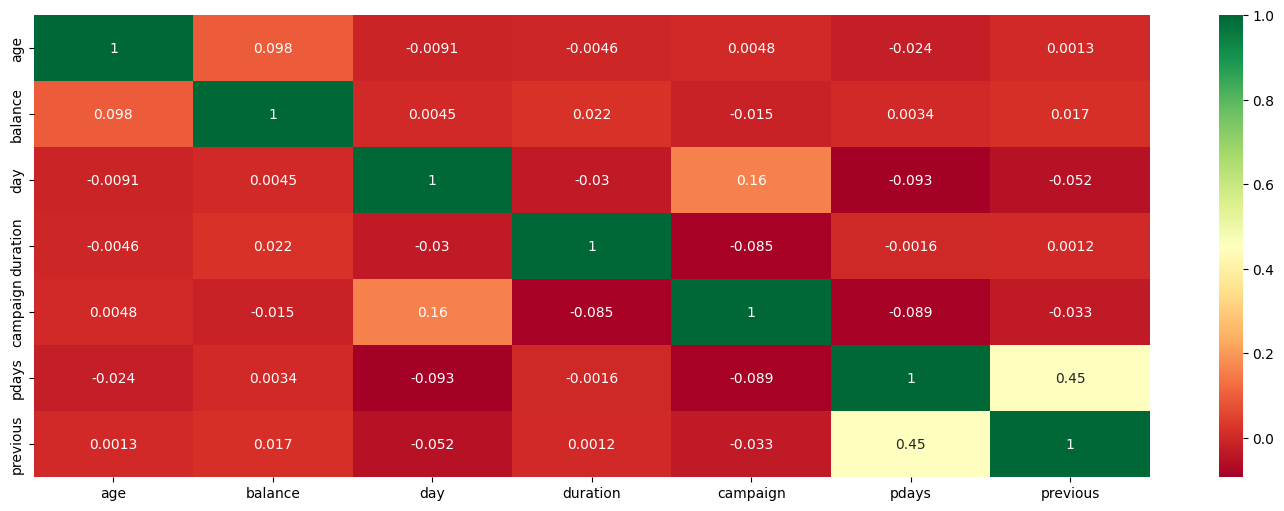

In [13]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.show()

UNIVARIATE ANALYSIS:
single feature at a time

- NUMERICAL FEATURES



<Axes: xlabel='age', ylabel='Density'>

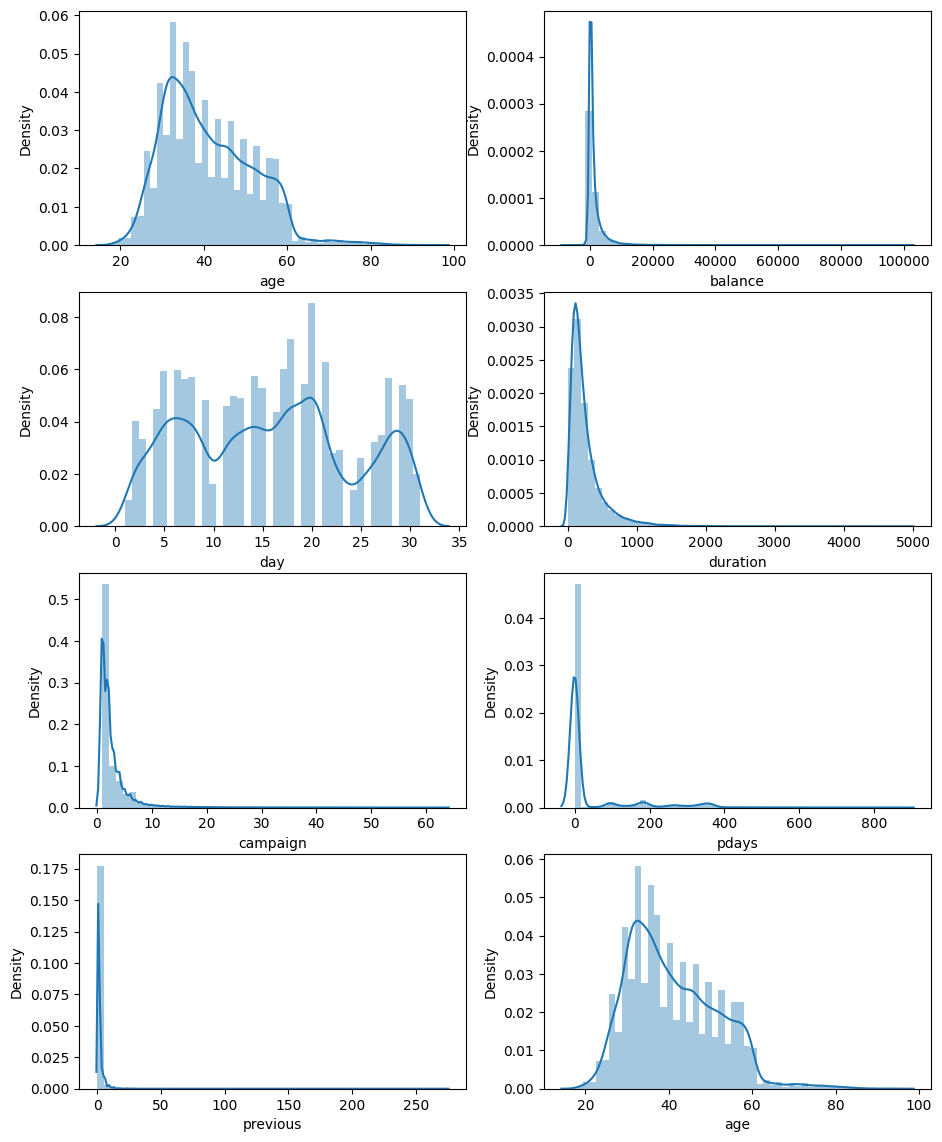

In [14]:
fig,ax=plt.subplots(nrows=4,ncols=2 ,figsize=(11,14))
sns.distplot(data['age'],kde=True,ax=ax[0,0])
sns.distplot(data['balance'],kde=True,ax=ax[0,1])
sns.distplot(data['day'],kde=True,ax=ax[1,0])
sns.distplot(data['duration'],kde=True,ax=ax[1,1])
sns.distplot(data['campaign'],kde=True,ax=ax[2,0])
sns.distplot(data['pdays'],kde=True,ax=ax[2,1])
sns.distplot(data['previous'],kde=True,ax=ax[3,0])
sns.distplot(data['age'],kde=True,ax=ax[3,1])

Voilation of assumsion , that data follows normal dist
hence POWER TRANSFROAMTION REQ


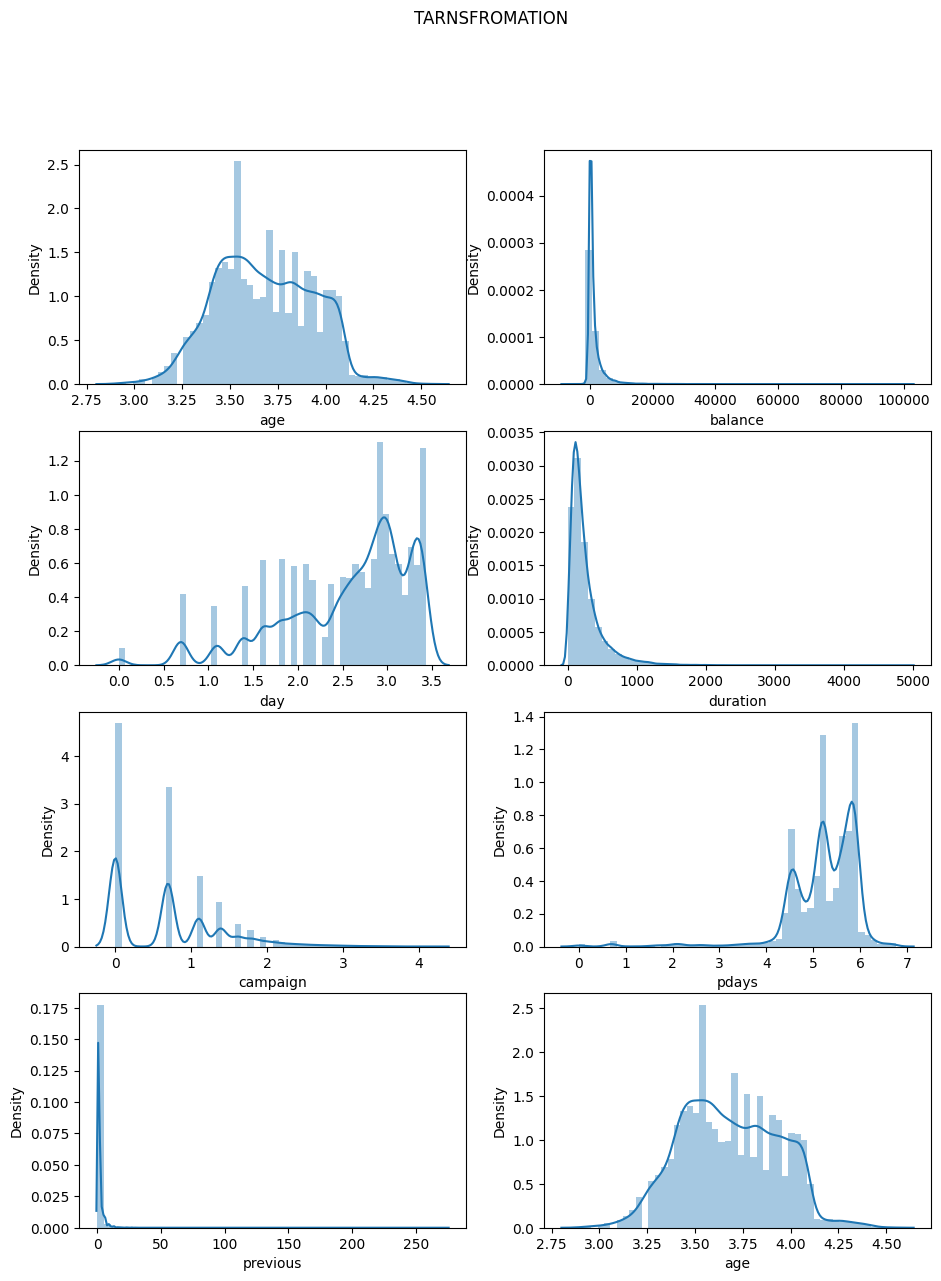

In [15]:
fig,ax=plt.subplots(nrows=4,ncols=2 ,figsize=(11,14))
sns.distplot(np.log(data['age']),kde=True,ax=ax[0,0])
sns.distplot((data['balance']),kde=True,ax=ax[0,1])
sns.distplot(np.log(data['day']),kde=True,ax=ax[1,0])
sns.distplot((data['duration']),kde=True,ax=ax[1,1])
sns.distplot(np.log(data['campaign']),kde=True,ax=ax[2,0])
sns.distplot(np.log(data['pdays']),kde=True,ax=ax[2,1])
sns.distplot((data['previous']),kde=True,ax=ax[3,0])
sns.distplot(np.log(data['age']),kde=True,ax=ax[3,1])
plt.suptitle('TARNSFROMATION')
plt.show()

CATEGORICAL FEATURES ANALYSIS

10 features are categorical in nature

    ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
    

In [16]:
#UNIQUE CATEGORIES
list=[]
clist=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for i in clist :
  total=len(data[i].unique())
  list.append((i,total))
print('( feature ', ',count of unique observations)')
list

( feature  ,count of unique observations)


[('job', 12),
 ('marital', 3),
 ('education', 4),
 ('default', 2),
 ('housing', 2),
 ('loan', 2),
 ('contact', 3),
 ('month', 12),
 ('poutcome', 4),
 ('y', 2)]

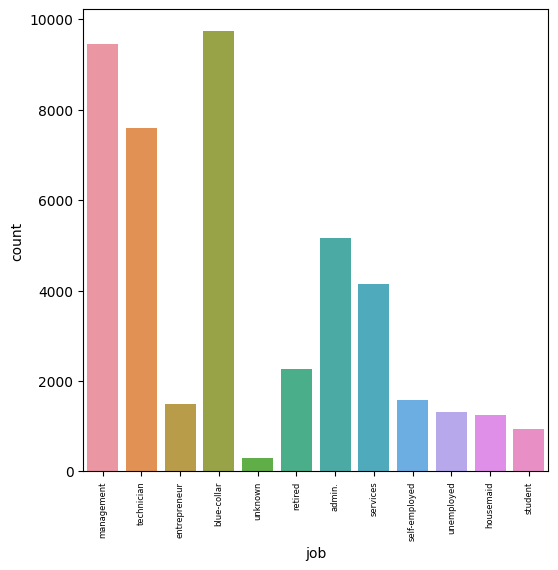

In [17]:
# JOB FEATURE ANANLYSIS
plt.figure( figsize=(6,6))
sns.countplot(x='job', data=data)
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

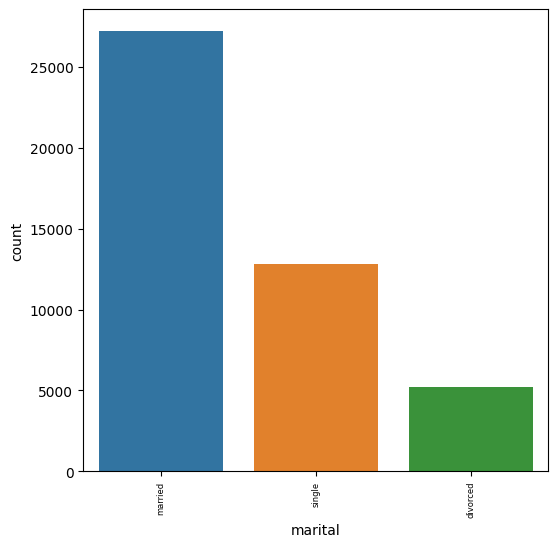

In [18]:
#MARTIAL STATUS
plt.figure( figsize=(6,6))
sns.countplot(x='marital', data=data)
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

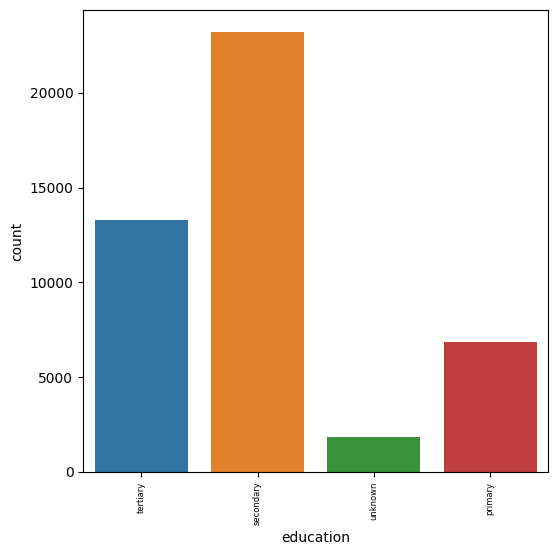

In [19]:
#education
plt.figure( figsize=(6,6))
sns.countplot(x='education', data=data)
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

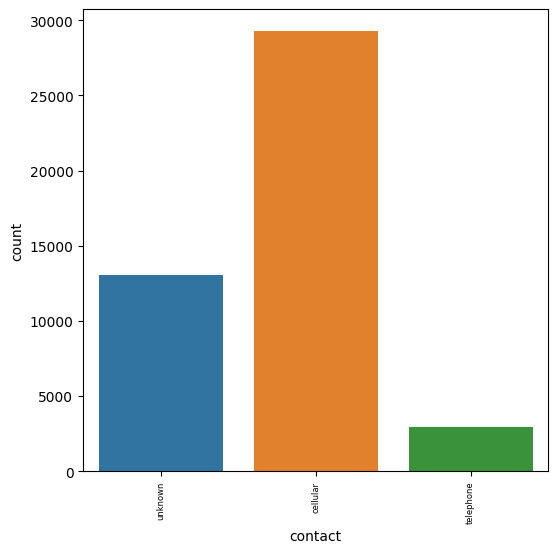

In [20]:
#CONTACT
plt.figure( figsize=(6,6))
sns.countplot(x='contact', data=data)
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

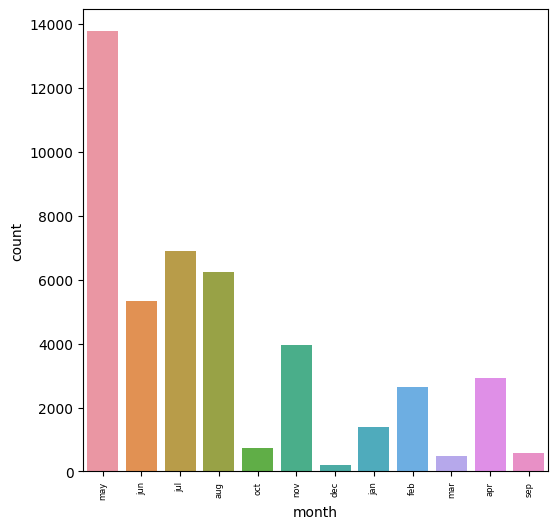

In [21]:
#MONTHLY ANALYSIS
plt.figure( figsize=(6,6))
sns.countplot(x='month', data=data)
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

RESPONSE FEATURE ANALYSIS

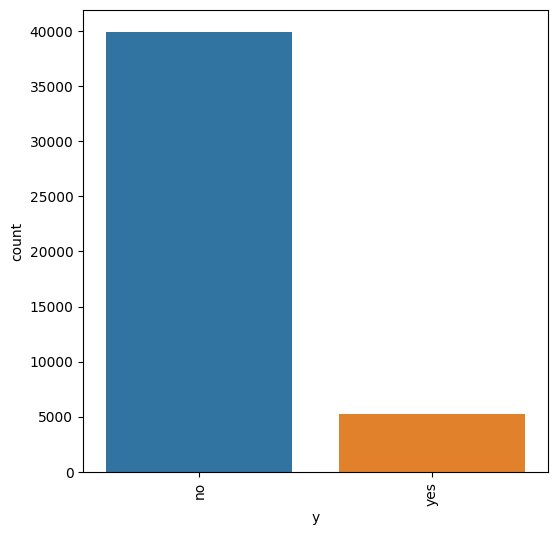

In [22]:
#OUTCOME/RESPONSE VARIABLE
plt.figure( figsize=(6,6))
sns.countplot(x='y', data=data)
plt.xticks(rotation = 90,fontsize =10)
plt.show()

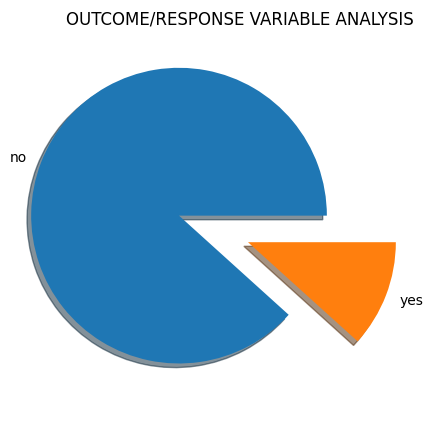

In [23]:
plt.pie(data['y'].value_counts(),labels=['no','yes'],explode =[0.5,0], shadow = True)
plt.suptitle("OUTCOME/RESPONSE VARIABLE ANALYSIS")
plt.show()

STATISTICAL ANALYSIS

- MEAN
- MODE
- MEDIAN
- RANGE
- IQR
- ST DEVAITION

In [24]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


DATA PRE-PROCESS

- LABEL ENCODING
- DUMMIES VARIABLES
- SCALING (STANDARD SCALING)

In [25]:
#CATEGORICAL INTO NUMERICAL DTYPE
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#LABEL ENCODING FOR REPONSE 'Y' - 0 FOR NO AND 1 FOR YES
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)

Conclusion - RESPONSE/TARGET VARIABLE

|REPONSE|LABEL ENCODING|
|-----|---|
|YES|1|
|NO|0|

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

SCALING

since age, balance etc in not in a proper range
HENCE, scaling is required

In [29]:
#scaling
data2=data1.copy()

#feature selected for scling
scale_f=['age','balance','duration']
features = data2[scale_f]

#other - contain column which not requires scaling
other = [columns for columns in data1.columns if columns not in scale_f]


#standard scaling module
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#putting in dataframe
data2 = pd.DataFrame(features, columns = scale_f)
data2[other] = data1[other]
data2.head()


,age,balance,duration,default,housing,loan,day,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.606965,0.256419,0.011016,0,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.288529,-0.437895,-0.416127,0,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.747384,-0.446762,-0.707361,0,1,1,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.571051,0.047205,-0.645231,0,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.747384,-0.447091,-0.233620,0,0,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


FEATURE SELECTION
----
LET

- x = independent/predictor var
- y = dependent/reponse var

In [30]:
x=data2.drop('y',axis=1)
y=data2['y']

In [31]:
x.columns

Index(['age', 'balance', 'duration', 'default', 'housing', 'loan', 'day',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

SPLIT

- TRAIN SET = 70%
- TEST SET = 30%

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [34]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (31647, 48)
Shape of x_test:  (13564, 48)
Shape of y_train:  (31647,)
Shape of y_test (13564,)


MODEL BUILDING
---

- training model on train dataset


In [35]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

MODEL ANALYSIS
---

- testing data
- comparing actual vs prediction

In [36]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
pred_df=pd.DataFrame({'ACTUAL':y_test,'MODEL':y_pred})
pred_df

,ACTUAL,MODEL
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


MODEL EVALUATION
----

- confusion matrix
- ROC curve
- AUC accuracy

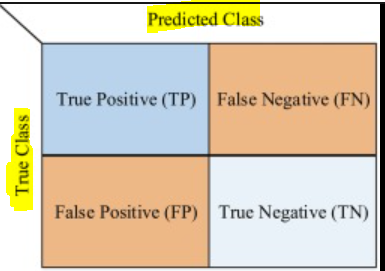

In [46]:
#CONFUSION MATRIX - on TEST SET
y_pred=classifier.predict(x_test)

#Building matrix
confusion_matrix_test = confusion_matrix(y_test,y_pred)
confusion_matrix_test

array([[11629,   340],
       [ 1041,   554]])

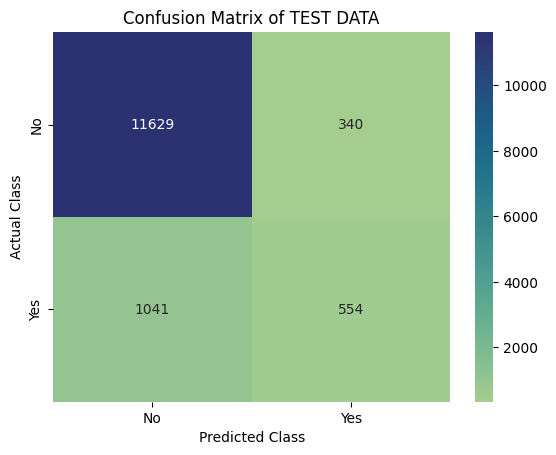

In [64]:
#visualizing matrix
df_cm = pd.DataFrame(confusion_matrix_test, index =["No", "Yes"], columns =["No", "Yes"])
#heatmap
sns.heatmap(df_cm, annot = True, fmt = "d",cmap="crest")
plt.title("Confusion Matrix of TEST DATA")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [52]:
#ACCURACY - TP+TN/TOTAL
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]


In [57]:
print('Accuracy =',((TP + TN) / float(TP + TN + FP + FN))*100,'%' )

Accuracy = 89.81863757003833 %


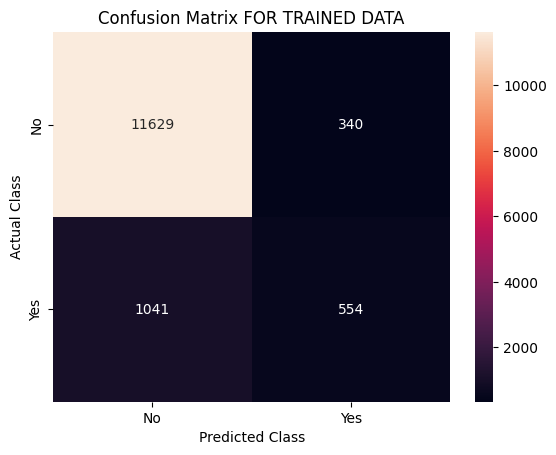

In [63]:
# CONFUSION MATRIX FOR TRAINED DATA
y_pred=classifier.predict(x_train)

#Building matrix
confusion_matrix_train = confusion_matrix(y_train,y_pred)

#visualizing matrix
df_cm1 = pd.DataFrame(confusion_matrix_train , index =["No", "Yes"], columns =["No", "Yes"])
#heatmap
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix FOR TRAINED DATA")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [59]:
TP = confusion_matrix_train[1, 1]
TN = confusion_matrix_train[0, 0]
FP = confusion_matrix_train[0, 1]
FN = confusion_matrix_train[1, 0]

In [62]:
print('Accuracy for trained set =',((TP + TN) / float(TP + TN + FP + FN))*100,'%' )

Accuracy for trained set = 90.21076247353619 %


In [70]:
#classification error = (FP + FN) /(TP + TN + FP + FN)
print('classification error = ',(FP + FN) /(TP + TN + FP + FN))

classification error =  0.09789237526463804


In [71]:
#recall = TP /(FN + TP)
print('recall',TP /(FN + TP))

recall 0.3500270709258257


In [72]:
#specificity = TN / (TN + FP)

print('specificity', TN / (TN + FP))

specificity 0.9750652881622723


In [75]:
#false positive rate = FP / (TN + FP)
print('false positive rate',FP / (TN + FP))

false positive rate 0.024934711837727615


In [74]:
#precision = TP /(TP + FP)
print('precision',TP /(TP + FP))

precision 0.6497487437185929


In [78]:
y_pred=classifier.predict(x_test)
f1_score = 2*((precision_score(y_test, y_pred) * recall_score(y_test, y_pred))/(precision_score(y_test, y_pred) + recall_score(y_test, y_pred)))
f1_score

0.44515869827239857

In [79]:
#prediction probability
classifier.predict_proba(x_test)[:,1]

array([0.01148869, 0.78991712, 0.01639144, ..., 0.00964221, 0.03226457,
       0.05683705])

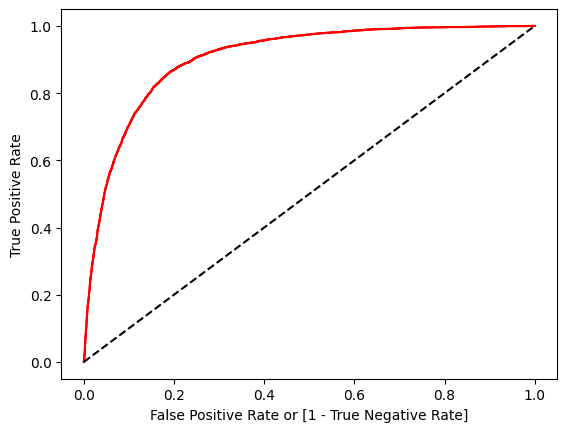

In [82]:
# ROC Curve plotting for test data
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [81]:
#AUC value
print('auc accuracy:',auc)

auc accuracy: 0.6594643529221649


Model evaluation conclusion

- Accuracy = 0.8980
- AUC accuracy: 0.659
- specificity 0.9750



PREDICTIONS
--

In [83]:
#Predictions for whole dataset
y_pred = classifier.predict(x)

# Creating a datframe for comparing actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0
